## Problem Statement

In recent times, the field of agriculture has been in urgent need of modernizing, since the amount of manual work people need to put in to check if plants are growing correctly is still highly extensive. Despite several advances in agricultural technology, people working in the agricultural industry still need to have the ability to sort and recognize different plants and weeds, which takes a lot of time and effort in the long term. The potential is ripe for this trillion-dollar industry to be greatly impacted by technological innovations that cut down on the requirement for manual labor, and this is where Artificial Intelligence can actually benefit the workers in this field, as **the time and energy required to identify plant seedlings will be greatly shortened by the use of AI and Deep Learning.** The ability to do so far more efficiently and even more effectively than experienced manual labor, could lead to better crop yields, the freeing up of human inolvement for higher-order agricultural decision making, and in the long term will result in more sustainable environmental practices in agriculture as well.


The aim of this project is to Build a Convolutional Neural Netowrk to classify plant seedlings into their respective categories.

The Aarhus University Signal Processing group, in collaboration with the University of Southern Denmark, has recently released a dataset containing **images of unique plants belonging to 12 different species.**

- Due to the large volume of data, the images were converted to the images.npy file and the labels are also put into Labels.csv, so that you can work on the data/project seamlessly without having to worry about the high data volume.

- The goal of the project is to create a classifier capable of determining a plant's species from an image.

**List of Species**

- Black-grass
- Charlock
- Cleavers
- Common Chickweed
- Common Wheat
- Fat Hen
- Loose Silky-bent
- Maize
- Scentless Mayweed
- Shepherds Purse
- Small-flowered Cranesbill
- Sugar beet

### A GPU runtime on Google Colab was used to execute the code faster.

In [ ]:
# Installing the libraries with the specified version.
# !pip install tensorflow==2.15.0 scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 opencv-python==4.8.0.76 -q --user

In [ ]:
# Installing the libraries with the specified version.
# uncomment and run the following lines if Jupyter Notebook is being used
#!pip install tensorflow==2.13.0 scikit-learn==1.2.2 seaborn==0.11.1 matplotlib==3.3.4 numpy==1.24.3 pandas==1.5.2 opencv-python==4.8.0.76 -q --user

In [ ]:
import os
import numpy as np                                                                               # Importing numpy for Matrix Operations
import pandas as pd                                                                              # Importing pandas to read CSV files
import matplotlib.pyplot as plt                                                                  # Importting matplotlib for Plotting and visualizing images
import math                                                                                      # Importing math module to perform mathematical operations
import cv2                                                                                       # Importing openCV for image processing
import seaborn as sns                                                                            # Importing seaborn to plot graphs


# Tensorflow modules
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator                              # Importing the ImageDataGenerator for data augmentation
from tensorflow.keras.models import Sequential                                                   # Importing the sequential module to define a sequential model
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,BatchNormalization # Defining all the layers to build our CNN Model
from tensorflow.keras.optimizers import Adam,SGD                                                 # Importing the optimizers which can be used in our model
from sklearn import preprocessing                                                                # Importing the preprocessing module to preprocess the data
from sklearn.model_selection import train_test_split                                             # Importing train_test_split function to split the data into train and test
from sklearn.metrics import confusion_matrix                                                     # Importing confusion_matrix to plot the confusion matrix
from sklearn.preprocessing import LabelBinarizer
# Display images using OpenCV
from google.colab.patches import cv2_imshow                                                      # Importing cv2_imshow from google.patches to display images
from sklearn.model_selection import train_test_split
from tensorflow.keras import backend
from keras.callbacks import ReduceLROnPlateau
import random
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load the image file of dataset
images = np.load('/content/drive/MyDrive/images.npy')      # Complete the code to read the dataset

# Load the labels file of dataset
labels = pd.read_csv('/content/drive/MyDrive/Labels.csv')  # Complete the code to read the dataset

## Data Overview

In [ ]:

print(images.shape)         # Complete the code to check the shape


print(labels.shape)         # Complete the code to check the shape


(4750, 128, 128, 3)
(4750, 1)


## Exploratory Data Analysis

### Plotting random images from each of the class

In [ ]:
def plot_images(images,labels):
  num_classes=10                                                                  # Number of Classes
  categories=np.unique(labels)
  keys=dict(labels['Label'])                                                      # Obtaing the unique classes from y_train
  rows = 3                                                                        # Defining number of rows=3
  cols = 4                                                                        # Defining number of columns=4
  fig = plt.figure(figsize=(10, 8))                                               # Defining the figure size to 10x8
  for i in range(cols):
      for j in range(rows):
          random_index = np.random.randint(0, len(labels))                        # Generating random indices from the data and plotting the images
          ax = fig.add_subplot(rows, cols, i * rows + j + 1)                      # Adding subplots with 3 rows and 4 columns
          ax.imshow(images[random_index, :])                                      # Plotting the image
          ax.set_title(keys[random_index])
  plt.show()

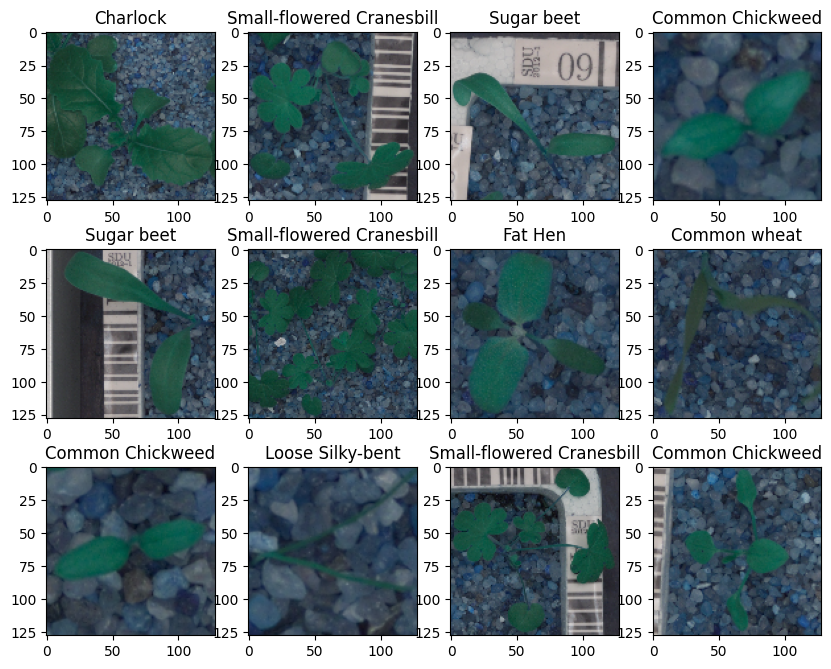

In [ ]:
# write your code here
plot_images(images, labels)   # Complete the code to input the images and labels to the function and plot the images with their labels


### Checking the distribution of the target variable

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'Small-flowered Cranesbill'),
  Text(1, 0, 'Fat Hen'),
  Text(2, 0, 'Shepherds Purse'),
  Text(3, 0, 'Common wheat'),
  Text(4, 0, 'Common Chickweed'),
  Text(5, 0, 'Charlock'),
  Text(6, 0, 'Cleavers'),
  Text(7, 0, 'Scentless Mayweed'),
  Text(8, 0, 'Sugar beet'),
  Text(9, 0, 'Maize'),
  Text(10, 0, 'Black-grass'),
  Text(11, 0, 'Loose Silky-bent')])

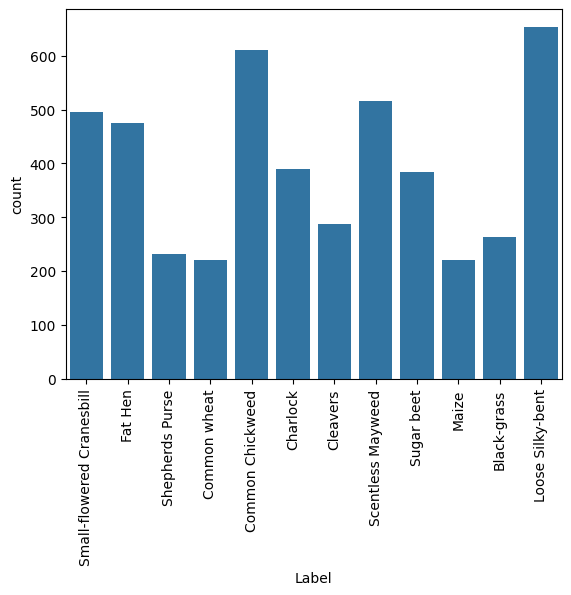

In [ ]:

sns.countplot(x=labels['Label'])            # Checking for data imbalance
plt.xticks(rotation='vertical')


## Data Pre-Processing

### Converting the BGR images to RGB images.

In [ ]:

for i in range(len(images)):
    images[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)        # Complete the code to convert the images from BGR to RGB


### Resizing images

In [ ]:

images_decreased = []
height = 64                    # Complete the code to define the height as 64
width = 64                     # Complete the code to define the width as 64
dimensions = (width, height)
for i in range(len(images)):
    images_decreased.append(cv2.resize(images[i], dimensions, interpolation=cv2.INTER_LINEAR))


**Image before resizing**

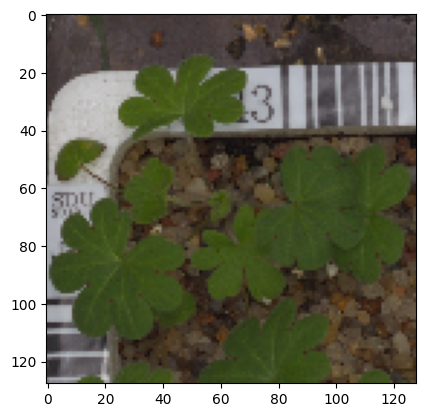

In [ ]:
plt.imshow(images[3])

**Image after resizing**

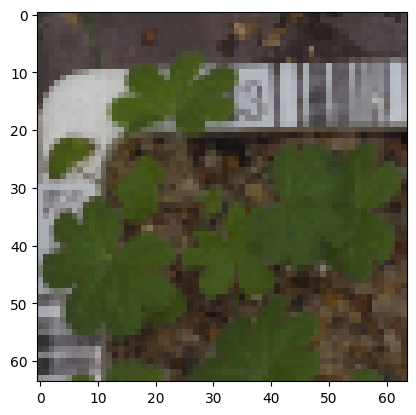

In [ ]:
plt.imshow(images_decreased[3])

### Data Preparation for Modeling


In [ ]:
# 20% of images to be used for testing and 80% to be used for training
X_train, X_temp, y_train, y_temp = train_test_split(images_decreased, labels, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Display the shapes of the resulting sets
print("X_train shape:", np.array(X_train).shape)
print("y_train shape:", np.array(y_train).shape)
print("X_val shape:", np.array(X_val).shape)
print("y_val shape:", np.array(y_val).shape)
print("X_test shape:", np.array(X_test).shape)
print("y_test shape:", np.array(y_test).shape)


X_train shape: (3800, 64, 64, 3)
y_train shape: (3800, 1)
X_val shape: (475, 64, 64, 3)
y_val shape: (475, 1)
X_test shape: (475, 64, 64, 3)
y_test shape: (475, 1)


### Encoding the target labels

In [ ]:

enc = LabelBinarizer()
y_train_encoded = enc.fit_transform(y_train['Label'])
y_val_encoded = enc.transform(y_val['Label'])
y_test_encoded = enc.transform(y_test['Label'])


In [ ]:

y_train_encoded.shape, y_val_encoded.shape, y_test_encoded.shape


((3800, 12), (475, 12), (475, 12))

### Data Normalization

Since the **image pixel values range from 0-255**, our method of normalization here will be **scaling** - we shall **divide all the pixel values by 255 to standardize the images to have values between 0-1.**

In [ ]:

X_train_normalized = np.array(X_train).astype('float32') / 255.0
X_val_normalized = np.array(X_val).astype('float32') / 255.0
X_test_normalized = np.array(X_test).astype('float32') / 255.0



## Model Building

In [ ]:
# Clearing backend
backend.clear_session()

In [ ]:
# Fixing the seed for random number generators
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [ ]:

model1 = Sequential()

# Code to add the first conv layer with 128 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension of images
model1.add(Conv2D(128, (3, 3), activation='relu', padding="same", input_shape=(64, 64, 3)))

# Code to add the max pooling to reduce the size of output of the first conv layer
model1.add(MaxPooling2D((2, 2), padding='same'))

# Code to create two similar convolution and max-pooling layers activation = relu
model1.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
model1.add(MaxPooling2D((2, 2), padding='same'))

model1.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model1.add(MaxPooling2D((2, 2), padding='same'))

# Code to flatten the output of the conv layer after max pooling to make it ready for creating dense connections
model1.add(Flatten())

# Code to add a fully connected dense layer with 16 neurons
model1.add(Dense(16, activation='relu'))
model1.add(Dropout(0.3))
# Code to add the output layer with 12 neurons and activation functions as softmax since this is a multi-class classification problem
model1.add(Dense(12, activation='softmax'))

# Code to use the Adam Optimizer
opt = Adam()
# Code to Compile the model using a suitable metric for the loss function
model1.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Code to generate the summary of the model
model1.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 128)       3584      
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 128)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 8, 8, 32)          0

<b> Fitting the model on the train data

In [ ]:

history_1 = model1.fit(
            X_train_normalized, y_train_encoded,
            epochs=30,
            validation_data=(X_val_normalized, y_val_encoded),
            batch_size=32,
            verbose=2
)


Epoch 1/30
119/119 - 8s - loss: 2.4564 - accuracy: 0.1203 - val_loss: 2.4412 - val_accuracy: 0.1537 - 8s/epoch - 70ms/step
Epoch 2/30
119/119 - 1s - loss: 2.3467 - accuracy: 0.2061 - val_loss: 2.1130 - val_accuracy: 0.3242 - 1s/epoch - 9ms/step
Epoch 3/30
119/119 - 1s - loss: 2.0355 - accuracy: 0.3316 - val_loss: 1.8628 - val_accuracy: 0.4021 - 1s/epoch - 9ms/step
Epoch 4/30
119/119 - 1s - loss: 1.8864 - accuracy: 0.3574 - val_loss: 1.7429 - val_accuracy: 0.4337 - 1s/epoch - 9ms/step
Epoch 5/30
119/119 - 1s - loss: 1.7918 - accuracy: 0.3742 - val_loss: 1.6647 - val_accuracy: 0.4316 - 1s/epoch - 9ms/step
Epoch 6/30
119/119 - 1s - loss: 1.7070 - accuracy: 0.3908 - val_loss: 1.6263 - val_accuracy: 0.4358 - 1s/epoch - 10ms/step
Epoch 7/30
119/119 - 1s - loss: 1.6494 - accuracy: 0.3979 - val_loss: 1.4870 - val_accuracy: 0.4863 - 1s/epoch - 11ms/step
Epoch 8/30
119/119 - 1s - loss: 1.5718 - accuracy: 0.4274 - val_loss: 1.4321 - val_accuracy: 0.5263 - 1s/epoch - 10ms/step
Epoch 9/30
119/119 -

**Model Evaluation**

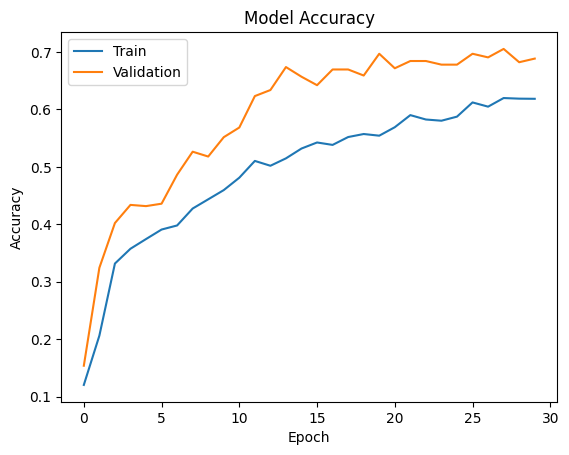

In [ ]:
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**Evaluate the model on test data**

In [ ]:

accuracy = model1.evaluate(X_test_normalized, y_test_encoded, verbose=2)    # Complete the code to evaluate the model on test data


15/15 - 0s - loss: 0.9872 - accuracy: 0.7179 - 209ms/epoch - 14ms/step


**Plotting the Confusion Matrix**

In [ ]:

y_pred = model1.predict(X_test_normalized)                          # Complete the code to predict the output probabilities


15/15 [==============================] - 0s 4ms/step


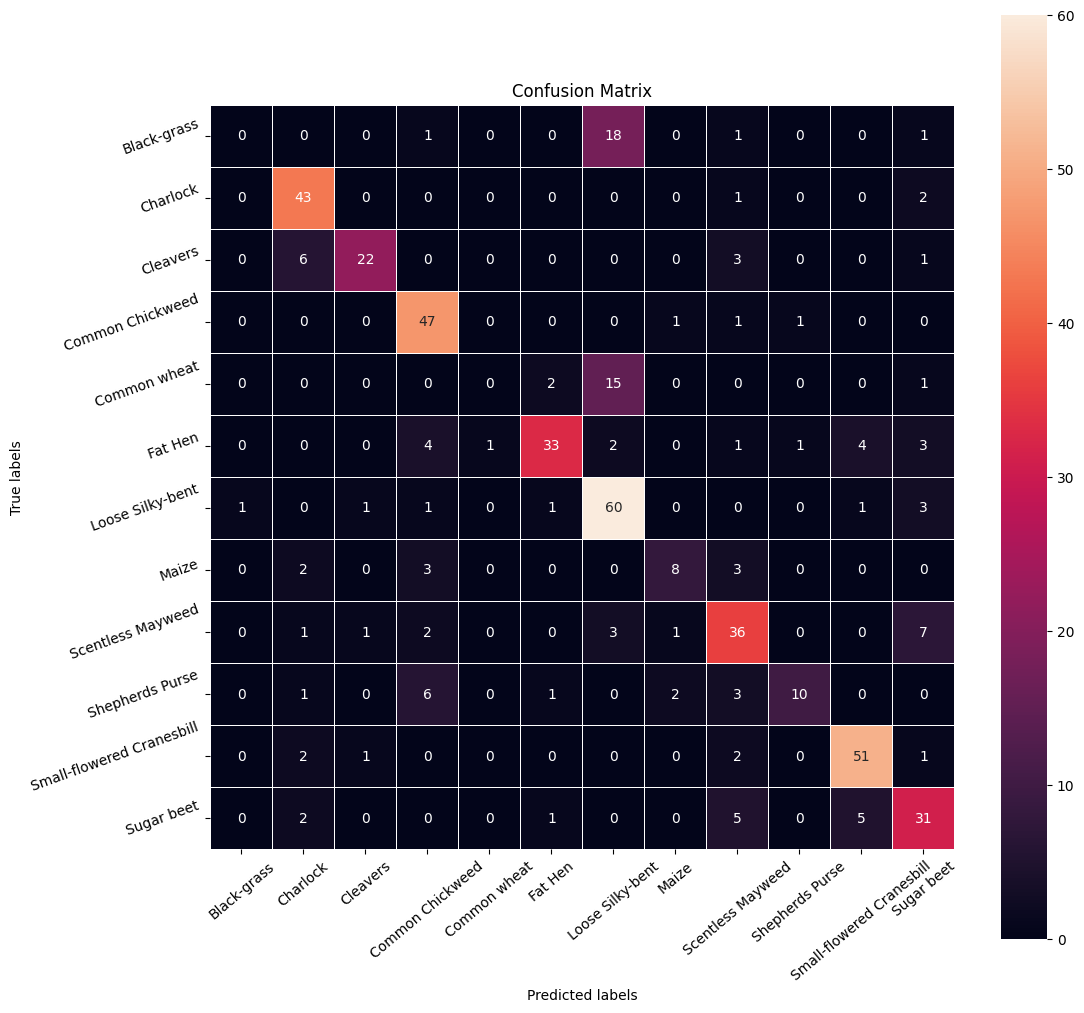

In [ ]:

y_pred_arg = np.argmax(y_pred, axis=1)
y_test_arg = np.argmax(y_test_encoded, axis=1)

confusion_matrix = tf.math.confusion_matrix(y_test_arg, y_pred_arg)              # Complete the code to plot the confusion matrix
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
# Setting the labels to both the axes
ax.set_xlabel('Predicted labels'); ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(list(enc.classes_), rotation=40)
ax.yaxis.set_ticklabels(list(enc.classes_), rotation=20)
plt.show()



**Plotting Classification Report**

In [ ]:

from sklearn import metrics
cr = metrics.classification_report(y_test_arg, y_pred_arg)     # Complete the code to plot the classification report
print(cr)


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        21
           1       0.75      0.93      0.83        46
           2       0.88      0.69      0.77        32
           3       0.73      0.94      0.82        50
           4       0.00      0.00      0.00        18
           5       0.87      0.67      0.76        49
           6       0.61      0.88      0.72        68
           7       0.67      0.50      0.57        16
           8       0.64      0.71      0.67        51
           9       0.83      0.43      0.57        23
          10       0.84      0.89      0.86        57
          11       0.62      0.70      0.66        44

    accuracy                           0.72       475
   macro avg       0.62      0.61      0.60       475
weighted avg       0.68      0.72      0.69       475



## Model Performance Improvement

In [ ]:
# Code to monitor val_accuracy
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=3,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)


### **Data Augmentation**

In [ ]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [ ]:
# Complete the code to set the rotation_range to 20
train_datagen = ImageDataGenerator(
                              rotation_range=20,
                              fill_mode='nearest'
                              )

In [ ]:

model2 = Sequential()

# Complete the code to add the first conv layer with 64 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension images
model2.add(Conv2D(64, (3, 3), activation='relu', padding="same", input_shape=(64, 64, 3)))

# Complete the code to add max pooling to reduce the size of output of the first conv layer
model2.add(MaxPooling2D((2, 2), padding='same'))

model2.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model2.add(MaxPooling2D((2, 2), padding='same'))
model2.add(BatchNormalization())

# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model2.add(Flatten())

# Adding a fully connected dense layer with 16 neurons
model2.add(Dense(16, activation='relu'))

# Complete the code to add dropout with dropout_rate=0.3
model2.add(Dropout(0.3))
# Complete the code to add the output layer with 12 neurons and activation functions as softmax since this is a multi-class classification problem
model2.add(Dense(12, activation='softmax'))

# Complete the code to initialize Adam Optimimzer
opt = Adam()
# Complete the code to Compile model
model2.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model2.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 batch_normalization (Batch  (None, 16, 16, 32)        128       
 Normalization)                                                  
                                                        

<b> Fitting the model on the train data

In [ ]:

# Epochs
epochs = 30
# Batch size
batch_size = 64

history = model2.fit(train_datagen.flow(X_train_normalized, y_train_encoded,
                                         batch_size=batch_size,
                                         shuffle=False),
                    epochs=epochs,
                    steps_per_epoch=X_train_normalized.shape[0] // batch_size,
                    validation_data=(X_val_normalized, y_val_encoded),
                    verbose=1, callbacks=[learning_rate_reduction])


Epoch 1/30
59/59 [==============================] - 10s 111ms/step - loss: 2.2574 - accuracy: 0.1804 - val_loss: 2.4186 - val_accuracy: 0.1263 - lr: 0.0010
Epoch 2/30
59/59 [==============================] - 4s 75ms/step - loss: 1.7982 - accuracy: 0.3613 - val_loss: 2.3465 - val_accuracy: 0.2947 - lr: 0.0010
Epoch 3/30
59/59 [==============================] - 6s 100ms/step - loss: 1.6297 - accuracy: 0.4069 - val_loss: 2.1806 - val_accuracy: 0.2716 - lr: 0.0010
Epoch 4/30
59/59 [==============================] - 5s 81ms/step - loss: 1.4957 - accuracy: 0.4660 - val_loss: 2.0595 - val_accuracy: 0.2989 - lr: 0.0010
Epoch 5/30
59/59 [==============================] - 7s 117ms/step - loss: 1.3746 - accuracy: 0.5011 - val_loss: 1.9218 - val_accuracy: 0.2611 - lr: 0.0010
Epoch 6/30
59/59 [==============================] - 4s 75ms/step - loss: 1.2880 - accuracy: 0.5471 - val_loss: 1.6280 - val_accuracy: 0.4737 - lr: 0.0010
Epoch 7/30
59/59 [==============================] - 6s 97ms/step - loss:

**Model Evaluation**

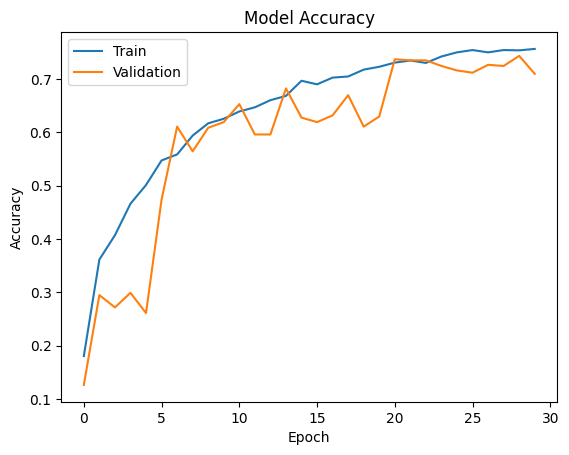

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**Evaluate the model on test data**

In [ ]:

accuracy = model2.evaluate(X_test_normalized, y_test_encoded, verbose=2)  # Complete the code to evaluate the model on test data


15/15 - 0s - loss: 0.6603 - accuracy: 0.7874 - 105ms/epoch - 7ms/step


**Plotting the Confusion Matrix**

In [ ]:

y_pred = model2.predict(X_test_normalized)


15/15 [==============================] - 0s 5ms/step


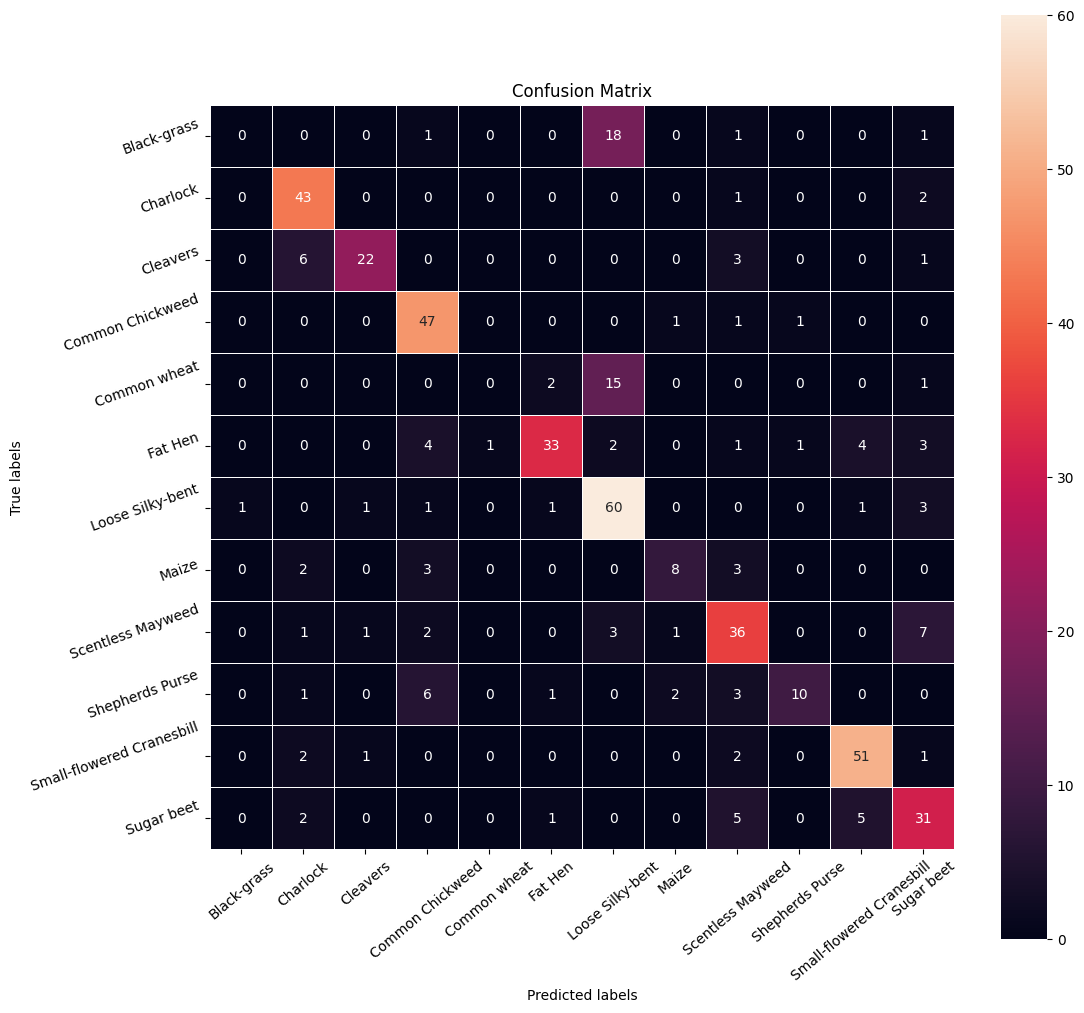

In [ ]:

confusion_matrix = tf.math.confusion_matrix(y_test_arg, y_pred_arg)     # Complete the code to obtain the confusion matrix
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
# Setting the labels to both the axes
ax.set_xlabel('Predicted labels'); ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(list(enc.classes_), rotation=40)
ax.yaxis.set_ticklabels(list(enc.classes_), rotation=20)
plt.show()


**Plotting Classification Report**

In [ ]:
# write your code here
cr = metrics.classification_report(y_test_arg, y_pred_arg)     # Complete the code to plot the classification report
print(cr)


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        21
           1       0.75      0.93      0.83        46
           2       0.88      0.69      0.77        32
           3       0.73      0.94      0.82        50
           4       0.00      0.00      0.00        18
           5       0.87      0.67      0.76        49
           6       0.61      0.88      0.72        68
           7       0.67      0.50      0.57        16
           8       0.64      0.71      0.67        51
           9       0.83      0.43      0.57        23
          10       0.84      0.89      0.86        57
          11       0.62      0.70      0.66        44

    accuracy                           0.72       475
   macro avg       0.62      0.61      0.60       475
weighted avg       0.68      0.72      0.69       475



## Final Model

Comment on the final model you have selected and use the same in the below code to visualize the image.

### Visualizing the prediction

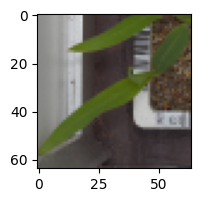

1/1 [==============================] - 0s 215ms/step
Predicted Label ['Maize']
True Label Maize


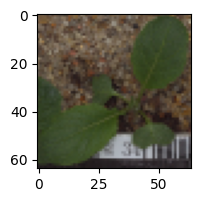

1/1 [==============================] - 0s 34ms/step
Predicted Label ['Sugar beet']
True Label Charlock


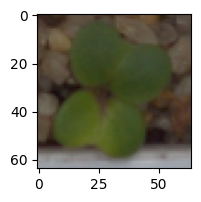

1/1 [==============================] - 0s 30ms/step
Predicted Label ['Charlock']
True Label Charlock


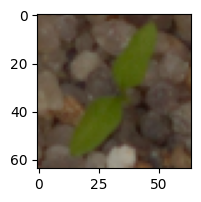

1/1 [==============================] - 0s 38ms/step
Predicted Label ['Common Chickweed']
True Label Common Chickweed


In [ ]:

# write your code here
plt.figure(figsize=(2, 2))
plt.imshow(X_test[2])
plt.show()
print('Predicted Label', enc.inverse_transform(model2.predict((X_test_normalized[2].reshape(1, 64, 64, 3)))))
print('True Label', enc.inverse_transform(y_test_encoded)[2])

plt.figure(figsize=(2, 2))
plt.imshow(X_test[33])
plt.show()
print('Predicted Label', enc.inverse_transform(model2.predict((X_test_normalized[33].reshape(1, 64, 64, 3)))))
print('True Label', enc.inverse_transform(y_test_encoded)[33])

plt.figure(figsize=(2, 2))
plt.imshow(X_test[59])
plt.show()
print('Predicted Label', enc.inverse_transform(model2.predict((X_test_normalized[59].reshape(1, 64, 64, 3)))))
print('True Label', enc.inverse_transform(y_test_encoded)[59])

plt.figure(figsize=(2, 2))
plt.imshow(X_test[36])
plt.show()
print('Predicted Label', enc.inverse_transform(model2.predict((X_test_normalized[36].reshape(1, 64, 64, 3)))))
print('True Label', enc.inverse_transform(y_test_encoded)[36])


## Actionable Insights and Business Recommendations

-We can observe that our second model is the best model as it predicted the majority of the classes correctly and also provided better accuracy.

-The performance of the model is generalized as the training accuracy is 75% and the test accuracy is 70%.

-Data Augmentation has also helped in improving the overall model performance.

-The model seems to be struggling in predicting the 'Black-grass' plant seeds as it has the most misclassifications.

_____